# Data Visualization in Python
----

# [matplotlib](https://matplotlib.org/) and pandas


outline: 
0. Anyone never used jupyter? Imports, etc. 
1. Types of plots - show some basic plots with example data (line, scatter, bar, histogram
2. plot construction with example dataset using matplotlib.pyplot API
  a. plots are 
  b. data aesthetics - line options [color, size, style], marker options [size, shape, face, edge]
2. Common axis style options - labels, title, legend, ticks, limits, 


## Table of Contents

[Plot Anatomy](#1)  
[Getting Started](2)  
[Doing It The Object Oriented Way](3)  
[Style Basics](3)  
[Subplots & Additional Plot Types]()  
[Figure Layout and Saving]()  
[Advanced Style w/ Seaborn]()  
[Documentation and Resources](stuff)  
[go here](#s2)


[Change this to discuss different approaches ]
pandas uses matplotlib to make plotting data sets easy.  You can also use features of matplotlib directly when plotting. We're going to use both methods below to see the differences and similarities.  The method (pandas or matplotlib) is marked for the cells so you can keep track of the different methods.

## Parts of a matplotlib plot

<tr>
    <td> <img src="Images/plotparts.png" alt="Drawing" style="width: 375px;"/> </td>
    <td> <img src="Images/anatomy1.png" alt="Drawing" style="width: 400px;"/> </td>
</tr>

## matplotlib documentation 

matplotlib.org

* http://matplotlib.org/users/beginner.html
* http://matplotlib.org/api/pyplot_summary.html
* http://matplotlib.org/gallery.html 

## Getting Started

Import libraries, tell the notebook to show matplotlib plots inline.  Use `%matplotlib notebook` instead for interactive plots; note that with interactive plots, you'll need to use `plt.close()` to close them afterward.

In [30]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

import datetime as dt
import matplotlib.dates as dates

Read in [earthquakes data](http://www.ldeo.columbia.edu/~felixw/NCAeqDD/).  It's on the large side, so it will take a minute to load.

Note that there's a bunch of extra info at the start of the file, so we'll need to skip that.  Also, some columns are combined under a single header, so we'll manually specify the header.

In [22]:
df = pd.read_csv("http://www.ldeo.columbia.edu/~felixw/NCAeqDD/NCAeqDD.v201112.1.gz", 
                 compression='gzip',
                 delim_whitespace=True, skiprows=79, na_values=[-1],
                 names=["YEAR", "MONTH", "DAY", "HOUR", "MINUTE", "SECOND",
                        "LAT", "LON", "DEP", "EH1", "EH2", "AZ", "EV", "MAG", "ID"])
df.head(10)

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LAT,LON,DEP,EH1,EH2,AZ,EV,MAG,ID
0,1984,1,1,1,19,11.317,36.08781,-120.22869,10.897,0.020,0.010,96.0,0.022,1.8,1109386
1,1984,1,1,1,58,2.420,36.87608,-120.90669,2.661,0.071,0.018,55.0,0.421,0.0,346
2,1984,1,1,1,59,27.124,36.87000,-120.90889,1.592,0.110,0.016,66.0,0.727,1.5,1109389
3,1984,1,1,2,28,4.240,37.51546,-118.75485,7.703,0.020,0.008,37.0,0.024,1.2,1109391
4,1984,1,1,3,8,58.044,40.57227,-124.55933,20.407,1.009,0.083,103.0,0.080,2.0,1109392
5,1984,1,1,3,15,36.690,37.56065,-118.84449,10.404,0.033,0.016,38.0,0.039,1.1,1109393
6,1984,1,1,4,46,38.708,38.80774,-122.84761,1.824,0.009,0.005,175.0,0.011,1.1,1109395
7,1984,1,1,5,1,53.594,36.24686,-120.39385,6.836,0.059,0.016,106.0,0.040,1.4,357
8,1984,1,1,7,8,31.986,36.49920,-121.07855,13.020,0.042,0.020,100.0,0.102,1.4,1109397
9,1984,1,1,7,17,21.373,37.54467,-118.86678,7.245,0.042,0.015,74.0,0.043,0.7,363


Text(0,0.5,'Depth')

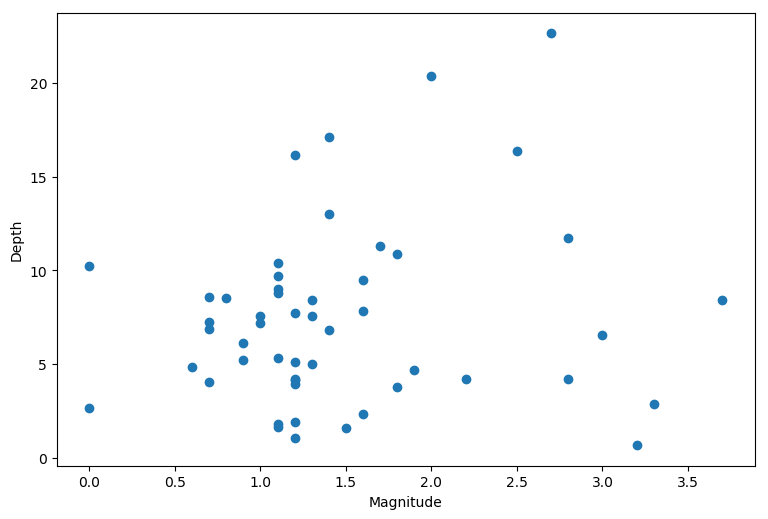

In [35]:
# Introduce OO interface:

fig, ax = plt.subplots()
ax.scatter(df.loc[:50,'MAG'], df.loc[:50,'DEP'])
ax.set_xlabel('Magnitude')
ax.set_ylabel('Depth')

Let's plot magnitude vs. depth, using only the first 50 obs.  See what different options do.

Let's just plot the data frame directly to start, using pandas defaults

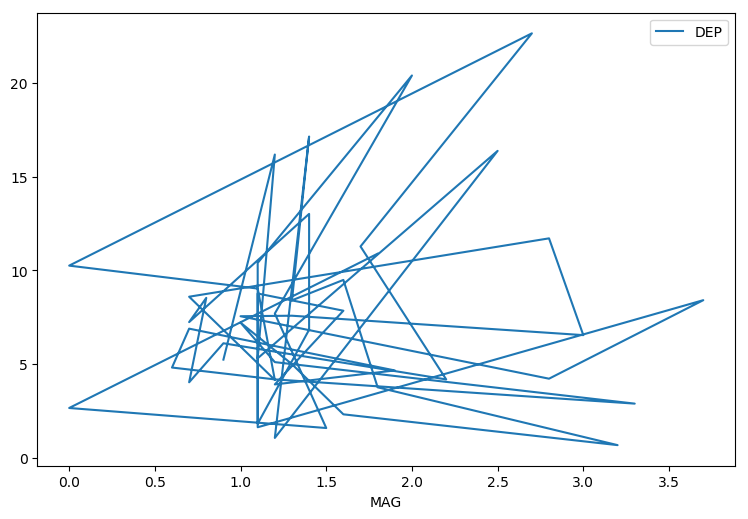

In [6]:
#pandas
df[:50].plot(x='MAG', y='DEP')

Hmm, not really what we want.  

Line plot is the default (see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html), but we can change that with the [`kind`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) parameter.  

Also note that we can omit the `<matplotlib.axes._subplots.AxesSubplot at 0x113d62898>` type output by putting a ; at the end of the plotting line

<a id='s2'></a>
# s2

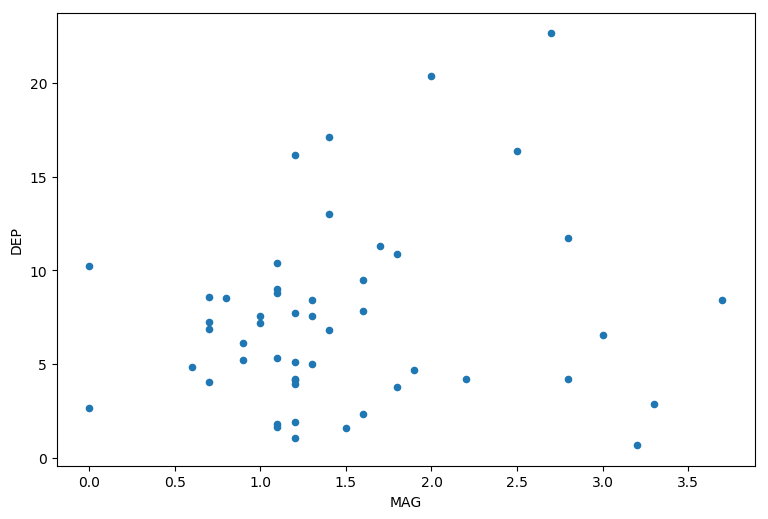

In [7]:
#pandas
df[:50].plot(x='MAG', y='DEP', kind='scatter'); # semicolon suppresses printing object info

Note that pandas conveniently gave us a default legend (for the line plot) and axis labels.

We could also use matplotlib directly.  `plt` is the alias for `matplotlib.pyplot` that we imported above.  See https://matplotlib.org/api/pyplot_api.html.  `plot` will make a line plot.  We use the `scatter` function for a scatter plot.

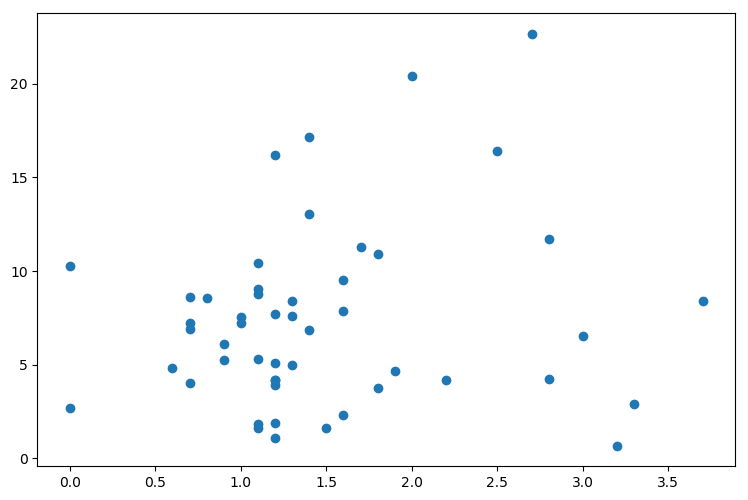

In [8]:
#matplotlib
plt.scatter(df['MAG'][:50], df['DEP'][:50]);

We lost the default axis labels that pandas gave us.  Also, default marker size is a little different.

Now change the [plot marker](https://matplotlib.org/api/markers_api.html).  We can add the `marker` option to either pandas' `DataFrame.plot` or matplotlib's `scatter`.  

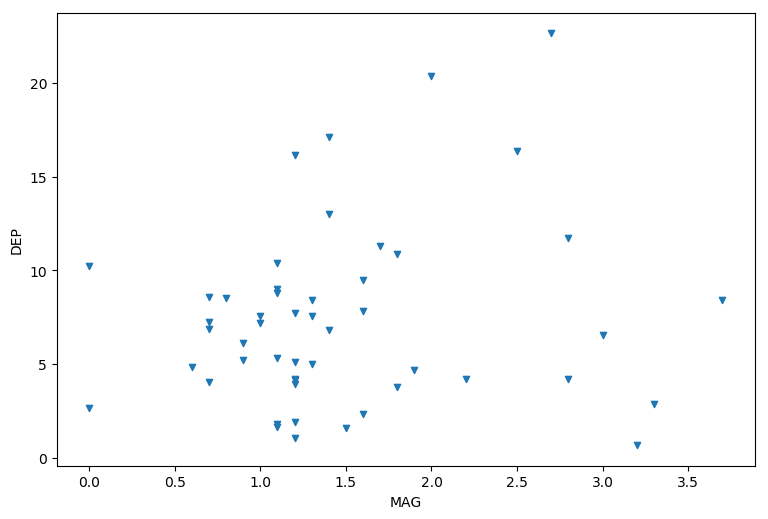

In [9]:
# pandas
df[:50].plot(x='MAG', y='DEP', kind="scatter", marker="v");

We can also change the marker size

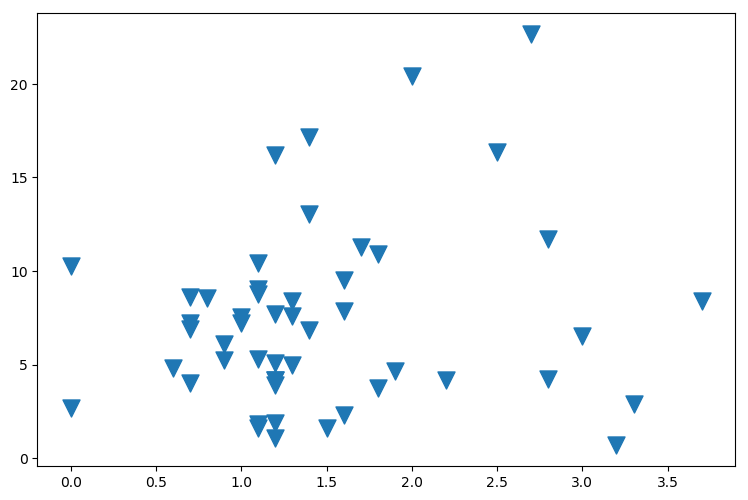

In [10]:
# matplotlib
plt.scatter(df['MAG'][:50], df['DEP'][:50], marker="v", s=150); 

How did we get marker size of 150?  Largely through trial and error.  However, marker sizes are in the units of the plot, and are proportional to the area of the marker.  

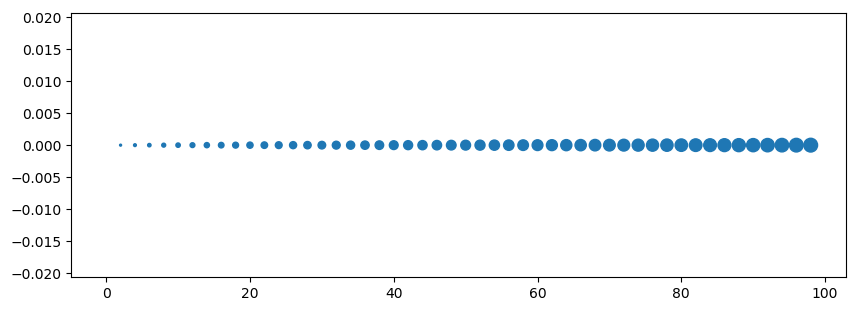

In [11]:
plt.figure(figsize=(10, 3.5))
plt.scatter(range(0,100,2), y=[0]*50, s=range(0,100,2));

Marker sizes don't have to be a constant.  They can be a function of other variables.  Now make each marker size a function of the magnitude (not a great idea from a visualization perspective...but we'll do a better example next)

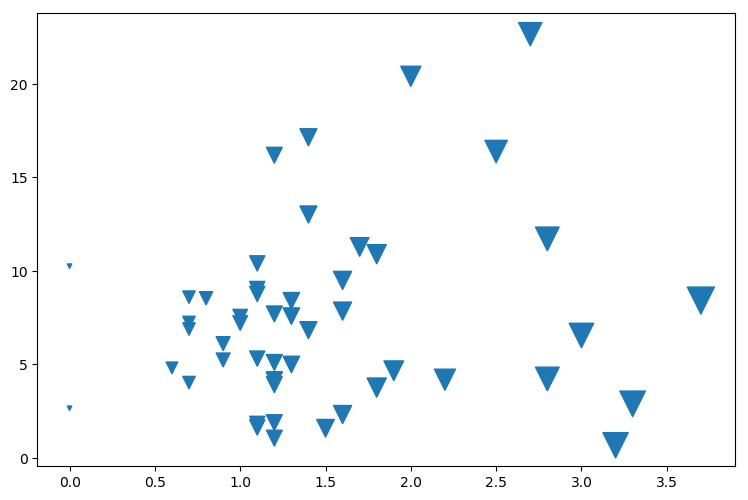

In [12]:
# matplotlib
plt.scatter(df['MAG'][:50], df['DEP'][:50], marker="v", 
            s=[10+100*df['MAG'][:50]]);

Let's change some other options on a pandas plot.  Using the `rdata` below, make a line plot, with x=idx and y=val; change the line color to red and make the line width size bigger (line width option is `linewidth`).  Refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) as needed.

In [13]:
rdata = pd.DataFrame({'idx':range(20), 'val':np.random.randint(0,100,size=20)})

In [14]:
rdata.head()

,idx,val
0,0,1
1,1,20
2,2,49
3,3,7
4,4,55


In [ ]:
# write plot code here


## Colorbar legend

We're aiming to make this plot:

![colorbar](Images/colorbar.png)

First, make a subset of the data with only earthquakes of magnitude 5 or more

In [ ]:
bigones = df[df['MAG'] >= 5]

Color markers by year of earthquake

In [ ]:
#pandas
bigones.plot(x='MAG', y='DEP', # data
                   kind='scatter', # type of plot
                   s=50, # marker size
                   cmap="cool", # color scheme: https://matplotlib.org/users/colormaps.html
                   c=bigones['YEAR'], # specific color for each point 
             title="Large Earthquakes");

Pandas gave us a default legend again, but we're missing the x-axis labels for some reason.  Not sure why this happens sometimes (there are some bugs like this in pandas), but we can also make the plot with matplotlib.  Start with the scatter plot.

In [ ]:
# matplotlib
pts = plt.scatter(bigones['MAG'], bigones['DEP'], # data
            s=50, # marker size
            cmap="cool", # color scheme: https://matplotlib.org/users/colormaps.html
            c=bigones['YEAR']) 

Add the legend

In [ ]:
#matplotlib

# we'll save the output from the plot call so we can use the data later for a legend
# specific color for each point (range between 0 and 1)
pts = plt.scatter(bigones['MAG'], bigones['DEP'], # data
            s=50, # marker size
            cmap="cool", # color scheme: https://matplotlib.org/users/colormaps.html
            c=bigones['YEAR']) 
plt.ylabel("Depth")
plt.xlabel("Magnitude")
plt.title("Large Earthquakes")
clrbar = plt.colorbar(pts); # give it the pts you plotted

Let's color by a different variable instead: `EV`, which is an error estimate on depth (I think).  Copy code from above, and make the changes you need.  Also change to the plasma color scheme.

## Working with Dates, Aggregating

Make some plots of data over time.

### Monthly Earthquake Counts

Start by making a plot of monthly earthquake counts for the last 4 years of the data.

![monthly](Images/monthly_earthquake.png)

Make a proper date column (instead of the current multiple columns for each part of the date) in the data frame so that we can plot by date.  Setting the new date column as an index lets us group by month easily.

In [ ]:
df['datetime'] = pd.to_datetime(df[df.columns[range(6)]]) ## first 6 columns are year, month, day, hour, min, sec
df = df.set_index("datetime")

In [ ]:
df.head()

Plot number of earthquakes by month with a bar chart, limit to recent years (the last 48 observations are the last 4 years (4 years * 12 months).  We need to use a grouper to tell pandas how to group the data by month.

In [ ]:
df.groupby(pd.Grouper(freq='M')).count()

In [ ]:
counts = df.groupby(pd.Grouper(freq='M')).count()['ID'][-48:] # do the aggregation
counts.head()

If we tried to just use the month variable, we'd end up with aggregates across month numbers:

In [ ]:
df.groupby(df.MONTH).count()['ID'][-48:]

Another way to get the counts is to use `resample()` instead of a grouper:

In [ ]:
df.loc['2008-01-01':'2012-01-01']

In [ ]:
df.loc['2008-01-01':'2012-01-01'].resample('M').count()['ID'];

When we plot this time, we'll need the axes, so we'll use `plt.subplots()` to have it returned.  `plt.subplots()` is a convenience function that returns both figure and axes, instead of doing:

```
fig = plt.figure(figsize=(10, 3.5))
ax = plt.subplot(1,1,1) # or plt.subplot(111) is equivalent
```

<IPython.core.display.Javascript object>


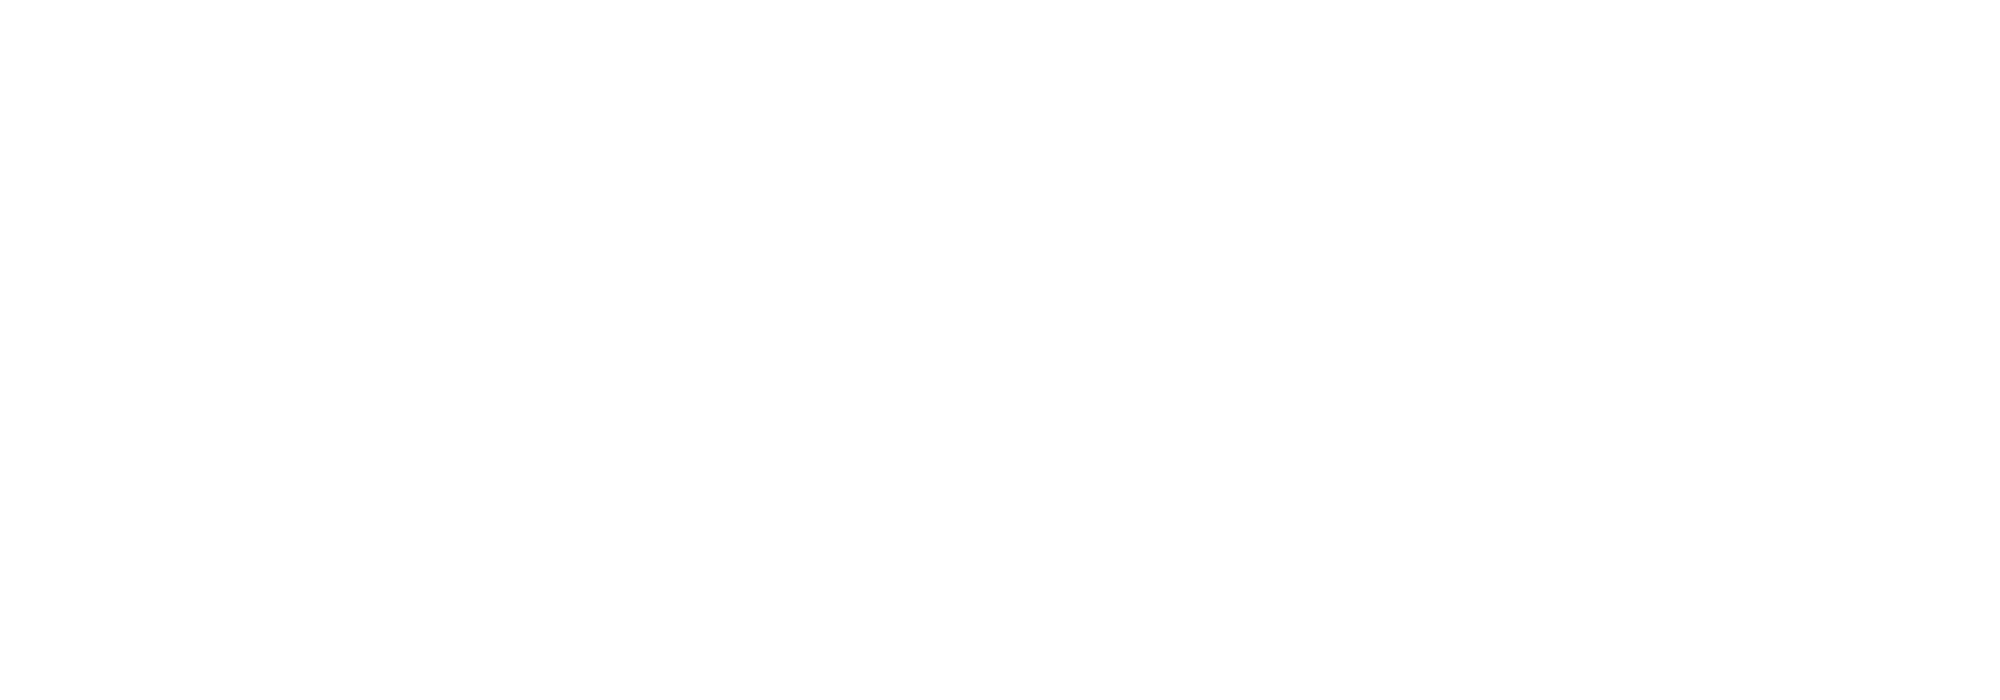

NameError: name 'counts' is not defined

<IPython.core.display.Javascript object>


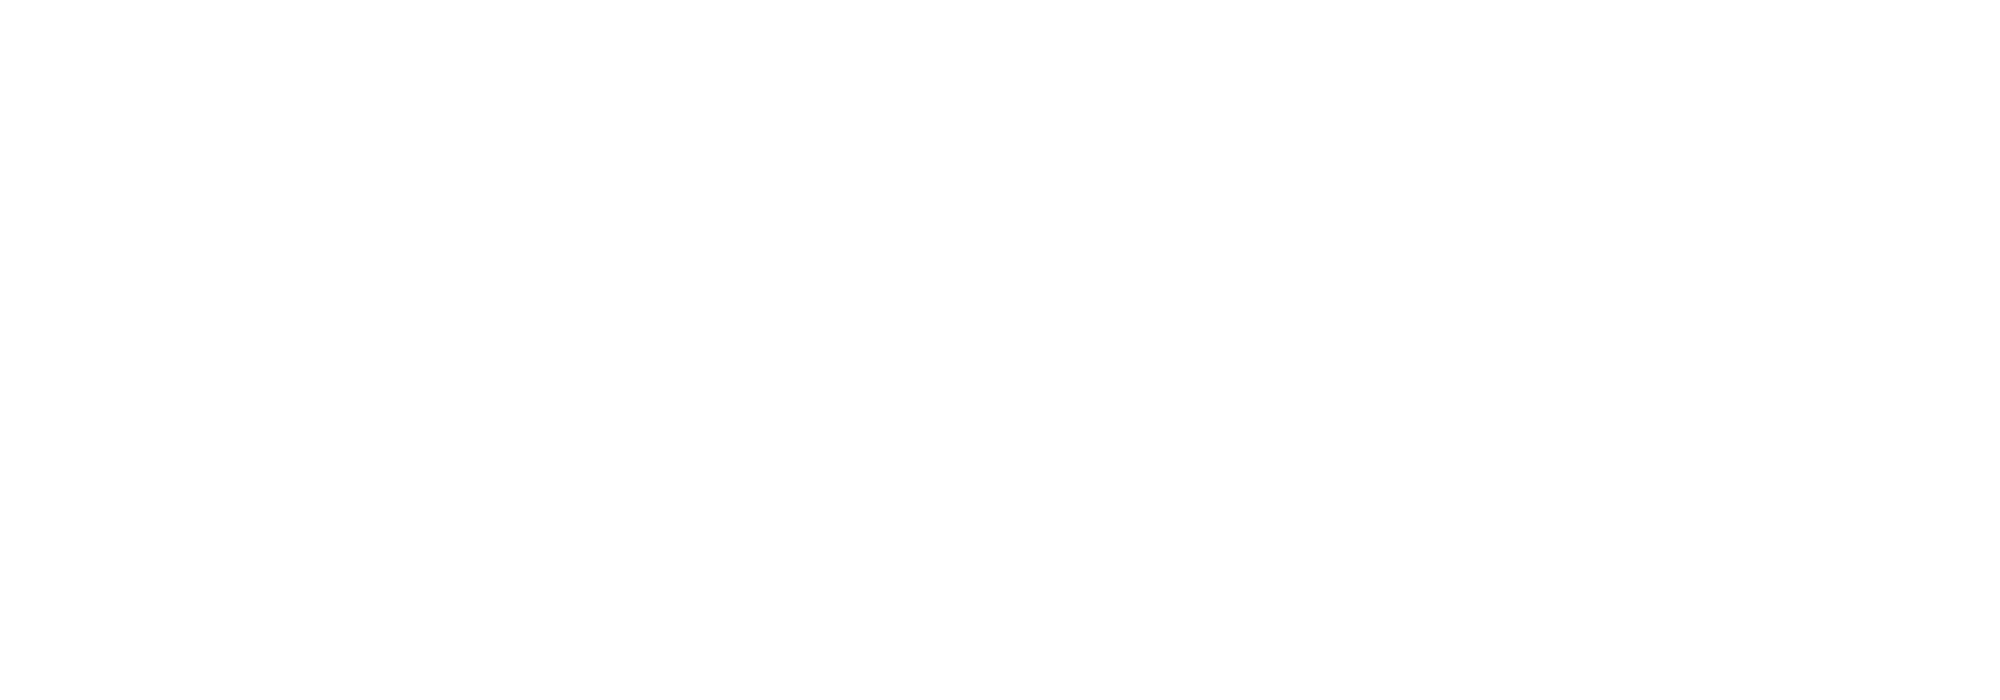

In [21]:
# matplotlib
fig, ax = plt.subplots(figsize=(10, 3.5)) # specify a plot size, use subplots to get axes because we'll need it later
plt.bar(counts.index, counts, width=15) # if we don't set the bar width, some bars might not be visible with this many
ax.xaxis_date()
plt.title("Monthly Earthquake Count for Northern California")
plt.ylabel("Number of Earthquakes");

We could also plot the `counts` object directly, although pandas likes to take care of the formatting of the date axis and doesn't make it easy to change:

In [ ]:
#pandas
counts.plot();

In [ ]:
#pandas 
counts.plot(kind="bar", 
                 figsize=(10, 3.5),
                title="Monthly Earthquake Count for Northern California");

### Hourly Counts on a Busy Day

Plot hourly earthquakes on a busy day, October 18, 1989:

![hourly](Images/hourly_earthquakes.png)

In [ ]:
counts_hourly = df.loc['1989-10-18'].groupby(pd.Grouper(freq='H')).count()['ID']
counts_hourly.head()

In [ ]:
# Another way to do the above:
df.loc['1989-10-18'].resample('1H').count()['ID'];

In [ ]:
#matplotlib
plt.subplots(figsize=(8, 3.5))
plt.bar(counts_hourly.index, counts_hourly);

Hmm, that doesn't look too good.  Fix it.  While we're at it, change the color and bar alignment.  And format the times to be just the hour.

This time, will use the figure, then subplot method, instead of using the subplots function.

In [ ]:
#matplotlib
fig = plt.figure() # just a different way to do it
ax = fig.add_subplot(111) ## saying that there's only one main plot being added to this figure
plt.bar(counts_hourly.index, 
        counts_hourly, width=.03, color='g', align='center')
ax.xaxis.set_major_formatter(dates.DateFormatter('%H'));

Looking better, but we can make it nicer.  Also export the plot as pdf (type is determined by file name extension).  With `%matplotlib inline` turned on, the save statement needs to be in the same cell of the notebook with the plot creation to work.

In [ ]:
#matplotlib
fig, ax = plt.subplots() ## in one line instead of two above, just to show this
plt.bar(counts_hourly.index, counts_hourly, width=.03, 
        color='g', align='center')
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:00'))
#plt.ylim(0, 95) ## could modify ylim manually, but below works even if data changes
ax.margins(0.025) ## control extra space at beginning and end of x-axis
plt.title("Northern California Earthquakes, 18 October 1989")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Earthquakes");
plt.savefig("plot1.pdf") # save the plot too

## Layered Plots

#### More on markers and legends; generate some random values with `randn` and make a histogram.  Add the theoretical distirbution line above it.

![normal](Images/normal.png)

Info on named colors at https://matplotlib.org/examples/color/named_colors.html

In [ ]:
from scipy.stats import norm
from numpy.random import randn

# plot with matplotlib

# keep the values returned from calling the histogram plot to use with the legend and next plot
n, bins, patches = plt.hist(randn(1000), bins=40, 
                            normed=True, 
                            color="lightblue")

# add another plot on top of the histogram
# save the value here too so we can use it for the legend
l, = plt.plot(bins, norm.pdf(bins, 0.0, 1.0), 
              'g--', linewidth=3)
## comma above in l, means unpack the returned tuple to give you just the line object

plt.legend([l, patches[0]], ['theory', 'data']);

## Annotating Plots

First, make the plot

In [ ]:
# pandas with matplotlib adjustments
counts = df.resample('D').count()['ID'];
counts.plot() ## plot the Series directly
plt.title("Daily Earthquake Count for Northern California")
plt.ylabel("Number of Earthquakes");

Then annotate one of the spikes:

In [ ]:
counts.plot() 
plt.title("Daily Earthquake Count for Northern California")
plt.ylabel("Number of Earthquakes")
plt.text(dt.datetime(1998,3,1), 925, "Big One!"); # use date to position on x-axis

Or with an arrow

In [ ]:
counts.plot() 
plt.title("Daily Earthquake Count for Northern California")
plt.ylabel("Number of Earthquakes")
plt.annotate("Big One!", xy=(dt.datetime(1998,3,1), 925),
             xytext=(dt.datetime(2000,3,1), 800),
             arrowprops=dict(facecolor='black', shrink=0.01, width=.1,
                             headwidth=5));

## Mathematical Functions

Let's make a plot like the following:

![mathplot](Images/mathfunction.png) 

For math text used in the labels, see https://matplotlib.org/users/mathtext.html

We'll take it step by step

In [ ]:
# generate data
x = np.arange(-2*np.pi, 2*np.pi, 0.01)
y = np.sin(x)

In [ ]:
# create empty plot
fig = plt.figure(figsize=(4, 5));
ax = fig.add_subplot(111);

# basic plot
# plot the sin wave
ax.plot(x, y,
        linewidth=3, # line thickness
        alpha=0.3); # line opacity -- just setting so we can see the labels and exis through it

In [ ]:
fig = plt.figure(figsize=(4, 5));
ax = fig.add_subplot(111);
ax.plot(x, y,linewidth=3, alpha=0.3);

# deal with bounding box 
# lose top and right
# move bottom and left to the center like a mathematical graph
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

In [ ]:
fig = plt.figure(figsize=(4, 5));
ax = fig.add_subplot(111);
ax.plot(x, y,linewidth=3, alpha=0.3);
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the reference lines
ax.plot([0, np.pi/2], [1, 1], ls="--", 
        color="green", alpha=0.5)
ax.plot([np.pi/2, np.pi/2], [1, 0], 
        ls="--", color="red", alpha=0.5);

In [ ]:
fig = plt.figure(figsize=(4, 5));
ax = fig.add_subplot(111);
ax.plot(x, y,linewidth=3, alpha=0.3);
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.plot([0, np.pi/2], [1, 1], ls="--", 
        color="green", alpha=0.5)
ax.plot([np.pi/2, np.pi/2], [1, 0], 
        ls="--", color="red", alpha=0.5);

# axis limits
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-1.5, 1.5)

# axis labels
xticker = np.arange(-np.pi-np.pi/2, np.pi+np.pi, np.pi/2)
xlabels = [r"$\frac{-3\pi}{2}$", r"${-\pi}$",
           r"$\frac{-\pi}{2}$","",r"$\frac{pi}{2}$",
           r"${\pi}$",r"$\frac{3\pi}{2}$"]

ax.set_xticks(xticker)
ax.set_xticklabels(xlabels, size=17)

yticker = np.arange(-1, 2, 1)
ax.set_yticks(yticker);

In [ ]:
fig = plt.figure(figsize=(4, 5));
ax = fig.add_subplot(111);
ax.plot(x, y,linewidth=3, alpha=0.3);
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.plot([0, np.pi/2], [1, 1], ls="--", 
        color="green", alpha=0.5)
ax.plot([np.pi/2, np.pi/2], [1, 0], 
        ls="--", color="red", alpha=0.5);
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-1.5, 1.5)
xticker = np.arange(-np.pi-np.pi/2, np.pi+np.pi, np.pi/2)
xlabels = [r"$\frac{-3\pi}{2}$", r"${-\pi}$",
           r"$\frac{-\pi}{2}$","",r"$\frac{pi}{2}$",
           r"${\pi}$",r"$\frac{3\pi}{2}$"]
ax.set_xticks(xticker)
ax.set_xticklabels(xlabels, size=17)
yticker = np.arange(-1, 2, 1)
ax.set_yticks(yticker);

# annotation of function line
ax.text(np.pi, 1.1, "y=sin(x)");

## Subplots

We used the subplot function above, but not to create multiple plots.  Let's actually make more than one.  

![multiple](Images/twoplots.png)

The marker/line type specification shortcuts used below can be seen at https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot

In [ ]:
# function and arrays to generate some data
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

# create a figure
plt.figure(1)
plt.subplot(211) # 211 = 2 rows, 1 column, first plot
plt.plot(t1, f(t1), 'bo', 
         t2, f(t2), 'k') # bo = blue, o marker

plt.subplot(212) # 212 = 2 rows, 1 column, second plot
plt.plot(t2, np.cos(2*np.pi*t2), 'r--'); # r-- = red, dashed line

## Styling

You can change the default style of matplotlib plots.  A list of available styles:

In [16]:
print(matplotlib.style.available)

['seaborn-dark', 'seaborn-deep', 'seaborn-muted', 'classic', 'fast', 'seaborn-white', 'Solarize_Light2', 'ggplot', 'seaborn-notebook', 'dark_background', 'seaborn-darkgrid', 'bmh', 'seaborn-ticks', 'seaborn', 'grayscale', 'seaborn-poster', 'seaborn-dark-palette', 'seaborn-talk', 'tableau-colorblind10', 'seaborn-pastel', '_classic_test', 'seaborn-colorblind', 'fivethirtyeight', 'seaborn-whitegrid', 'seaborn-bright', 'seaborn-paper']


And you can see a gallery of what plots look like in the styles at https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

To just affect a single plot, with `with`

In [ ]:
with plt.style.context(('dark_background')):
    pts = plt.scatter(bigones['MAG'], bigones['DEP'], # data
            s=50, # marker size
            cmap="cool", # color scheme: https://matplotlib.org/users/colormaps.html
            c=1.0*(bigones['YEAR']-1983)/28) # specific color for each point (range between 0 and 1)
    plt.ylabel("Depth")
    plt.xlabel("Magnitude")
    plt.title("Large Earthquakes")
    clrbar = plt.colorbar(pts, ticks=[1.0/28, 27.0/28]) # data takes values from 1983=1/28, 2010=27/28 (none in 2011)
    clrbar.ax.set_yticklabels(['1984', '2010'])

In [ ]:
with plt.style.context(('fivethirtyeight')):
    pts = plt.scatter(bigones['MAG'], bigones['DEP'], # data
            s=50, # marker size
            cmap="cool", # color scheme: https://matplotlib.org/users/colormaps.html
            c=1.0*(bigones['YEAR']-1983)/28) # specific color for each point (range between 0 and 1)
    plt.ylabel("Depth")
    plt.xlabel("Magnitude")
    plt.title("Large Earthquakes")
    clrbar = plt.colorbar(pts, ticks=[1.0/28, 27.0/28]) # data takes values from 1983=1/28, 2010=27/28 (none in 2011)
    clrbar.ax.set_yticklabels(['1984', '2010'])

You can also write your own styles: https://matplotlib.org/users/style_sheets.html

## Interactive Plots

Above we turned off the interactive plots in the notebook.  Let's turn them back on to see what they do.

<IPython.core.display.Javascript object>


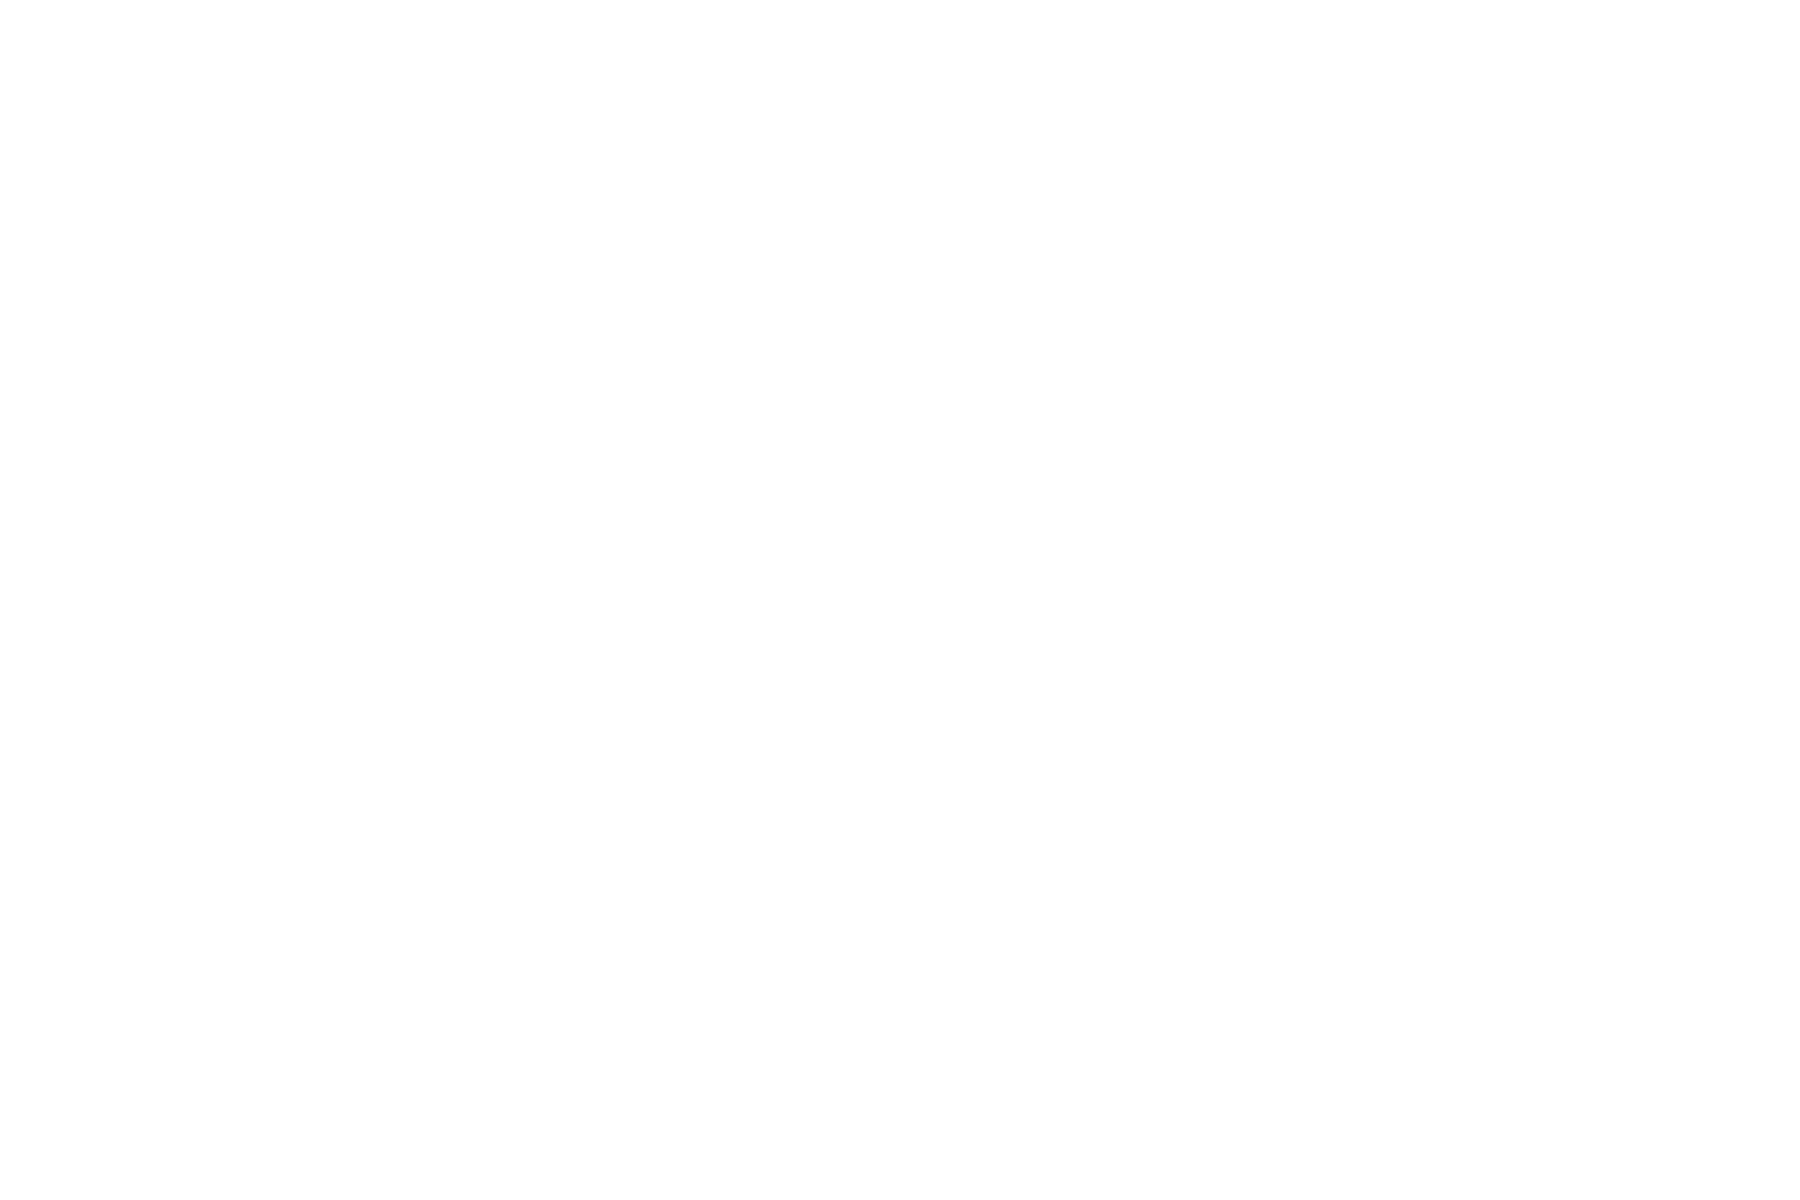

NameError: name 'bigones' is not defined

<IPython.core.display.Javascript object>


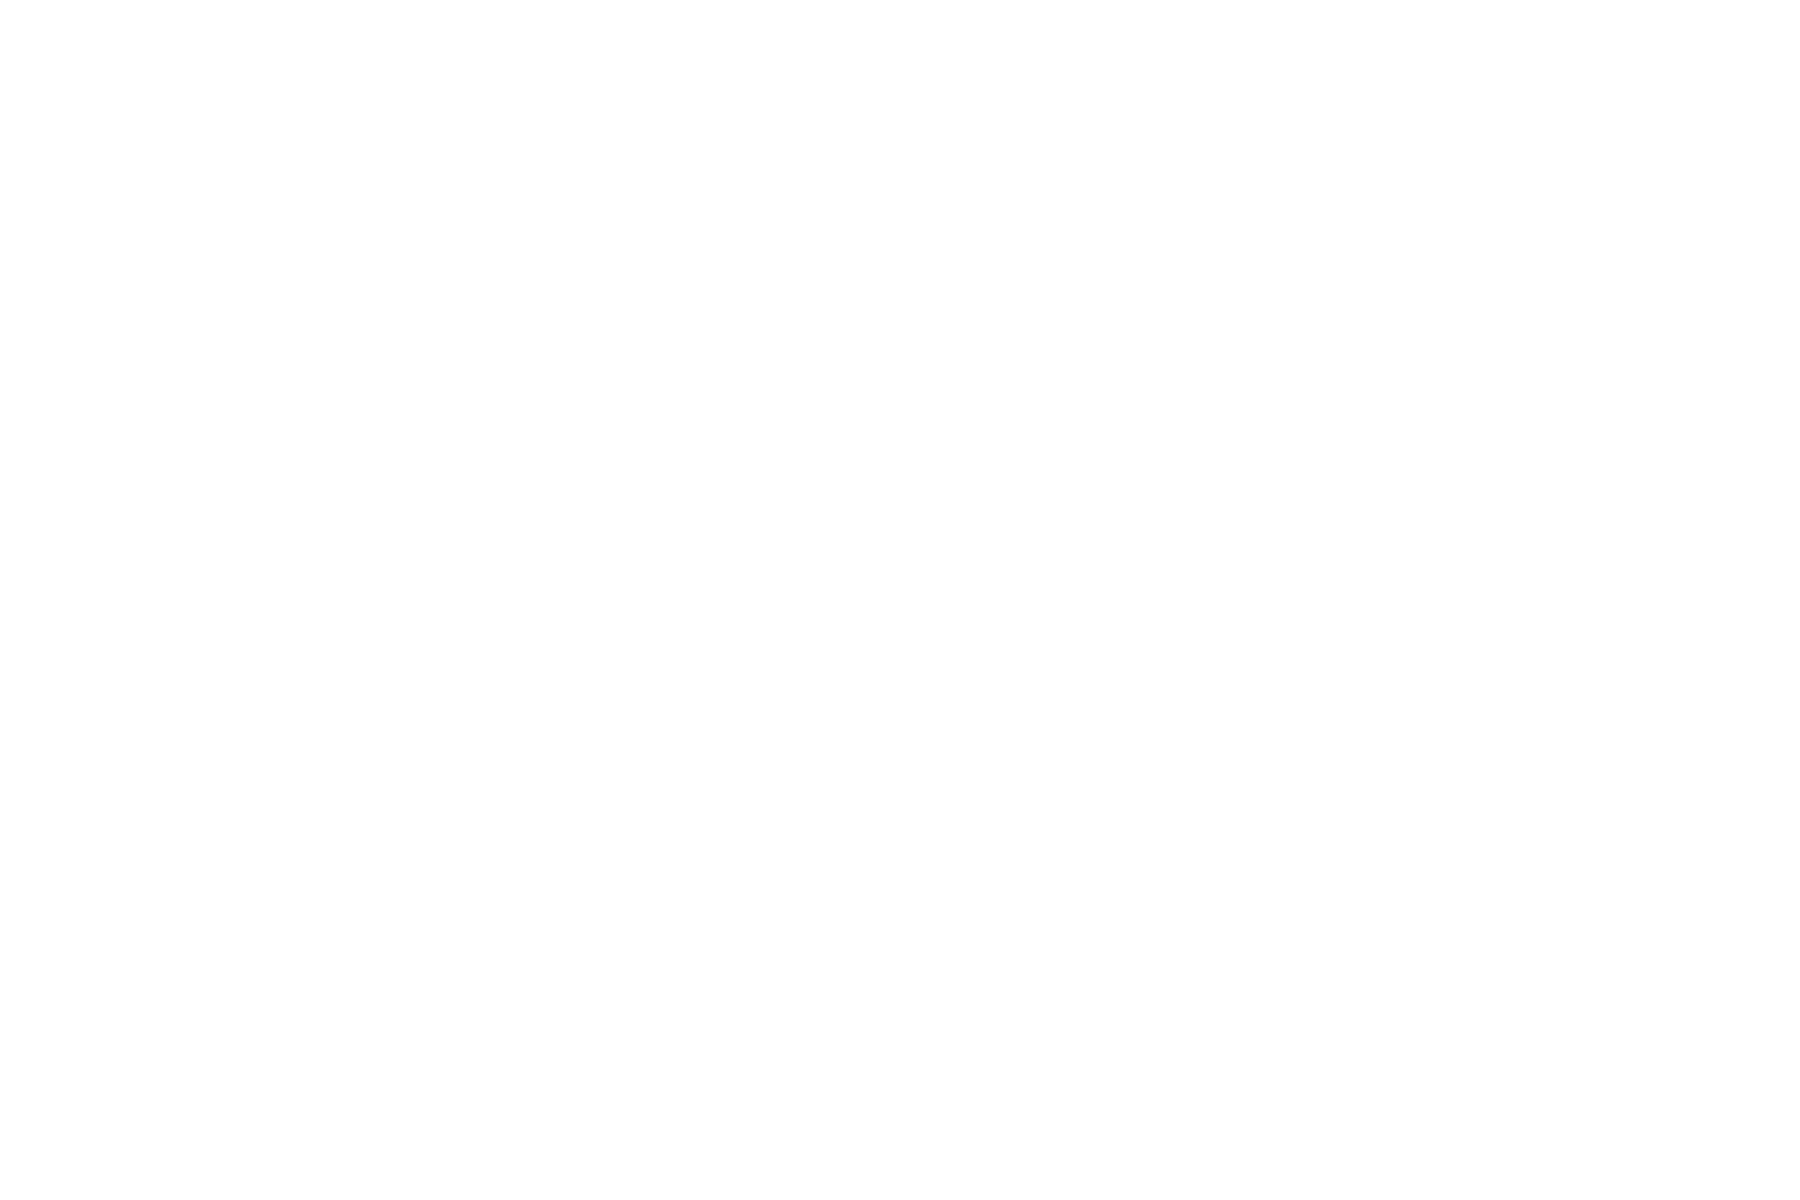

In [15]:
%matplotlib notebook
plt.figure()
pts = plt.scatter(bigones['MAG'], bigones['DEP'], # data
        s=50, # marker size
        cmap="cool", # color scheme: https://matplotlib.org/users/colormaps.html
        c=1.0*(bigones['YEAR']-1983)/28) # specific color for each point (range between 0 and 1)
plt.ylabel("Depth")
plt.xlabel("Magnitude")
plt.title("Large Earthquakes")
clrbar = plt.colorbar(pts, ticks=[1.0/28, 27.0/28]) # data takes values from 1983=1/28, 2010=27/28 (none in 2011)
clrbar.ax.set_yticklabels(['1984', '2010']);

And now turn it back off:

In [ ]:
%matplotlib inline

## Image Data

Plot a MRI image, change the [color map](https://matplotlib.org/examples/color/colormaps_reference.html); [source](https://matplotlib.org/examples/pylab_examples/mri_demo.html)

[Colormap creation tool](http://jdherman.github.io/colormap/)

In [ ]:
import matplotlib.cbook as cbook # for the data
import matplotlib.cm as cm # for color map

In [ ]:
fig, ax = plt.subplots(num="MRI_demo")

# Data are 256x256 16 bit integers
dfile = cbook.get_sample_data('s1045.ima.gz')
im = np.fromstring(dfile.read(), np.uint16).astype(float)
im.shape = (256, 256)
dfile.close()

ax.imshow(im, cmap=cm.gray)
ax.axis('off');

In [ ]:
fig, ax = plt.subplots(num="MRI_demo")
ax.imshow(im, cmap=cm.viridis)
ax.axis('off')

In [1]:
c = np.matrix('0,0,0; 0,0,0; 0,1,1; 0,1,1; 0,1,1; 0,1,2; 0,2,2; 0,2,2; 0,2,3; 0,2,3; 0,3,3; 0,3,4; 0,3,4; 0,3,4; 0,4,5; 0,4,5; 0,4,5; 0,4,6; 0,5,6; 0,5,6; 0,5,7; 0,5,7; 0,6,7; 0,6,8; 0,6,8; 0,6,8; 0,7,9; 0,7,9; 0,7,10; 0,7,10; 0,8,10; 0,8,11; 0,8,11; 0,8,11; 0,9,12; 0,9,12; 0,9,12; 0,9,13; 0,10,13; 0,10,13; 0,10,14; 0,10,14; 0,11,14; 0,11,15; 0,11,15; 0,11,15; 0,12,16; 0,12,16; 0,12,16; 0,12,17; 0,13,17; 0,13,17; 0,13,18; 0,13,18; 0,14,18; 0,14,19; 0,14,19; 0,15,19; 0,15,20; 0,15,20; 0,15,20; 0,16,21; 0,16,21; 0,16,21; 0,16,22; 1,17,23; 1,18,24; 1,19,25; 2,20,26; 2,21,27; 3,22,28; 3,23,29; 4,23,30; 4,24,31; 4,25,32; 5,26,33; 5,27,34; 6,28,35; 6,29,36; 6,30,37; 7,30,38; 7,31,39; 8,32,40; 8,33,41; 9,34,42; 9,35,44; 9,36,45; 10,37,46; 10,37,47; 11,38,48; 11,39,49; 12,40,50; 12,41,51; 12,42,52; 13,43,53; 13,44,54; 14,44,55; 14,45,56; 15,46,57; 15,47,58; 15,48,59; 16,49,60; 16,50,61; 17,50,62; 17,51,63; 17,52,64; 18,53,65; 18,54,66; 19,55,67; 19,56,68; 20,57,69; 20,57,70; 20,58,71; 21,59,72; 21,60,73; 22,61,74; 22,62,75; 23,63,77; 23,64,78; 23,64,79; 24,65,80; 24,66,81; 25,67,82; 25,68,83; 26,69,84; 26,70,85; 26,71,86; 27,71,87; 28,72,88; 29,74,89; 31,75,90; 32,76,91; 34,77,92; 35,78,93; 37,80,93; 38,81,94; 40,82,95; 41,83,96; 43,84,97; 44,86,98; 46,87,99; 48,88,100; 49,89,101; 51,90,102; 52,91,103; 54,93,104; 55,94,105; 57,95,106; 58,96,107; 60,97,108; 61,99,109; 63,100,110; 64,101,110; 66,102,111; 67,103,112; 69,105,113; 70,106,114; 72,107,115; 73,108,116; 75,109,117; 76,110,118; 78,112,119; 79,113,120; 81,114,121; 82,115,122; 84,116,123; 85,118,124; 87,119,125; 88,120,126; 90,121,127; 91,122,128; 93,124,128; 94,125,129; 96,126,130; 98,127,131; 99,128,132; 101,129,133; 102,131,134; 104,132,135; 105,133,136; 107,134,137; 108,135,138; 110,137,139; 111,138,140; 113,139,141; 114,140,142; 116,141,143; 117,143,144; 119,144,145; 120,145,145; 122,146,146; 123,147,147; 125,149,148; 127,151,148; 129,152,148; 131,154,149; 133,156,149; 135,157,149; 138,159,149; 140,161,150; 142,162,150; 144,164,150; 146,166,150; 148,167,151; 150,169,151; 152,171,151; 154,172,151; 156,174,152; 158,176,152; 160,177,152; 162,179,152; 164,181,153; 166,183,153; 168,184,153; 171,186,153; 173,188,154; 175,189,154; 177,191,154; 179,193,154; 181,194,155; 183,196,155; 185,198,155; 187,199,155; 189,201,156; 191,203,156; 193,204,156; 195,206,156; 197,208,157; 199,210,157; 201,211,157; 203,213,157; 206,215,158; 208,216,158; 210,218,158; 212,220,158; 214,221,159; 216,223,159; 218,225,159; 220,226,159; 222,228,160; 224,230,160; 226,231,160; 228,233,161; 230,235,161; 232,236,161; 234,238,161; 236,240,162; 239,242,162; 241,243,162; 243,245,162; 245,247,163; 247,248,163; 249,250,163; 251,252,163; 253,253,164; 255,255,164')
cmp = matplotlib.colors.ListedColormap(c/255.0)

NameError: name 'np' is not defined

In [ ]:
fig, ax = plt.subplots(num="MRI_demo")
ax.imshow(im, cmap=cmp)
ax.axis('off')

## 3D Surfaces

[mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/index.html) if for 3D plotting.  [Example source](https://matplotlib.org/examples/mplot3d/custom_shaded_3d_surface.html)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

filename = cbook.get_sample_data('jacksboro_fault_dem.npz', 
                                 asfileobj=False) #data
with np.load(filename) as dem:
    z = dem['elevation']
    nrows, ncols = z.shape
    x = np.linspace(dem['xmin'], dem['xmax'], ncols)
    y = np.linspace(dem['ymin'], dem['ymax'], nrows)
    x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

print(x.shape)

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft') # make colors
surf = ax.plot_surface(x, y, z, # 2D arrays of data
                       rstride=1, # row step
                       cstride=1, # column step
                       facecolors=rgb, #the shade from above
                       shade=False) # because we already computed what we wanted

In [ ]:
%matplotlib inline

# [Seaborn](https://seaborn.pydata.org)
----

[Seaborn](https://seaborn.pydata.org) is one option moving beyond the basic plots.  It's focus is statistical visualization.

Seaborn is not part of the Anaconda distribution, so you'll need to install it.  Copy the command below into a new cell and run it (only the first time you need to use it):

```
!pip3 install seaborn
```

Note that if you're running multiple versions of Python on your system, you might need to install the package from the command line instead into the correct environment.  Via the terminal, if you're using Anaconda, use `conda install seaborn`.

In [ ]:
import seaborn as sns

## Density/Bivariate Distribution Plots

When we have a lot of data, scatter plots can get difficult to read.  Let's do a density plot instead to explore a bivariate distribution.  Seaborn has several options, both for the density plot and supplementary plots along the axes.  http://seaborn.pydata.org/tutorial/distributions.html#plotting-bivariate-distributions

In [ ]:
sns.jointplot(x=df['MAG'][:1000], 
              y=df['DEP'][:1000], 
              kind="hex", 
              color="k"); # color k is black

`jointplot` takes care of the overall plot.  If you want more control over the core and axes plots, you can add a density plot and axes plots to an existing matplotlib figure.

In [ ]:
sns.set() # use Seaborn default styling
fig, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df['MAG'][:1000], df['DEP'][:1000], ax=ax)
sns.rugplot(df['MAG'][:1000], color="g", ax=ax)
sns.rugplot(df['DEP'][:1000], vertical=True, ax=ax);

## Regression and Trend Lines

Seaborn has many functions for visualizing linear relationships and even interaction effect between (or conditional effects of) variables: http://seaborn.pydata.org/tutorial/regression.html

First, a standard regression plot

In [ ]:
sns.regplot(x="MAG", y="DEP", data=df[:1000]);

This includes a 95% confidence interval on the slope coefficient in the plot by default (you can turn it off with the `ci` parameter).  We can also plot the residuals (errors) from a regression to check fit and adherence to model assumptions:  

In [ ]:
sns.residplot("MAG","DEP", df[:1000]);

There are further options for variations like polynomial fits, logistic regression, loess smoothing, and robust regression (eliminates/down-weights outliers).

In addition to `regplot`, there's also the slightly more powerful `lmplot` that let's us condition the slope and intercept on a third variable.

In [ ]:
df['north'] = df['LAT'] > 38 # create a new variable to divide earthquakes by latitude
sns.lmplot(x="MAG", y="DEP", hue="north", data=df.sample(500));